Taller:
Sebastian Gutierrez
Jefferson Astudillo

# Optimización de hiperparámetros con PCA y sin PCA para la predicción de pérdida de clientes en Empresas de Servicios de Telecomunicaciones (Churn) con KNN


Reducir las salidas y [deserciones de clientes](https://www.bain.com/insights/breaking-the-back-of-customer-churn/) se ha convertido en una alta prioridad para la mayoría de los proveedores de servicios de comunicaciones a medida que los mercados maduran y la competencia se intensifica.




En este documento usaremos una base de datos de una empresa de telecomunicaciones anónima [disponibilizada por IBM](https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv).

El principal objetivo es crear un model de aprendizaje automático basado en KNN (similar al propuesto [aquí con SVM](https://github.com/mmcuri/ds_handson/blob/master/Telecom_Churn_Prediction.ipynb)) para predecir la pérdida o salida de clientes en una empresa de telecomunicaciones.


## Librerías

Importamos varias bibliotecas y módulos útiles para el análisis de datos y el aprendizaje automático en Python. A continuación se describe cada uno de ellos:

- `pandas as pd`: Importa la biblioteca Pandas y la renombra como "pd". Pandas es una biblioteca popular utilizada para la manipulación y análisis de datos en Python.

- `numpy as np`: Importa la biblioteca NumPy y la renombra como "np". NumPy es una biblioteca de Python utilizada para realizar operaciones matemáticas en matrices y vectores.

- `matplotlib.pyplot as plt`: Importa la biblioteca Matplotlib y el módulo pyplot y lo renombra como "plt". Matplotlib es una biblioteca utilizada para la visualización de datos en Python.

- `from sklearn.metrics import classification_report`: Importa la función classification_report desde el módulo metrics de la biblioteca scikit-learn. classification_report es una función que calcula y muestra un informe de clasificación detallado para un modelo de clasificación.

- `from sklearn.metrics import confusion_matrix`: Importa la función confusion_matrix desde el módulo metrics de la biblioteca scikit-learn. confusion_matrix es una función que calcula y muestra la matriz de confusión para un modelo de clasificación.

- `from sklearn.metrics import accuracy_score`: Importa la función accuracy_score desde el módulo metrics de la biblioteca scikit-learn. accuracy_score es una función que calcula y muestra la precisión de un modelo de clasificación.

- `from sklearn.metrics import roc_auc_score`: Importa la función roc_auc_score desde el módulo metrics de la biblioteca scikit-learn. roc_auc_score es una función que calcula el área bajo la curva ROC (AUC) para un modelo de clasificación.

- `from sklearn.preprocessing import StandardScaler, LabelEncoder`: Importa las clases StandardScaler y LabelEncoder desde el módulo preprocessing de la biblioteca scikit-learn. StandardScaler es una clase utilizada para estandarizar los datos y LabelEncoder es una clase utilizada para codificar las etiquetas de clase en números enteros.

- `from sklearn.model_selection import train_test_split`: Importa la función train_test_split desde el módulo model_selection de la biblioteca scikit-learn. train_test_split es una función que divide los datos en conjuntos de entrenamiento y prueba para su uso en el modelado predictivo.

En resumen, este código importa varias bibliotecas y módulos que son útiles para el análisis de datos y el aprendizaje automático en Python.


In [45]:
# importing libraries
import pandas as pd #excel sofisticado
import numpy as np #matlab
import matplotlib.pyplot as plt #plots
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


## Base de datos

Este conjunto de datos contiene un total de 7043 clientes y 21 características de los mismos. De las entradas, 5174 son clientes activos y 1869 son clientes que la empresa ha perdido. Observe que el conjunto de datos está desbalanceado pues por cada cliente perdido existe casi 3 clientes activos. La variable de salida para nuestro modelo de machine learning será `Churn`.

In [46]:
# importamos dataset
DATA_PATH = "https://raw.githubusercontent.com/mtgca/datasets_public/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
#print(df)
# vemos las primeras 5 filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### *Detalles de la base de datos*

*	`customerID` - Custumer unique identifier
*	`gender` - Customer gender - ['Female' 'Male']
*	`SeniorCitizen` - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 of 65 years
*	`Partner` - - ['No' 'Yes']
*	`Dependents` - If customer has dependents - ['No' 'Yes']
*	`Tenure` - Customer lifespan (in months)
*	`PhoneService` - - ['No' 'Yes']
*	`MultipleLines` - - ['No' 'No phone service' 'Yes']
*	`InternetService` - - ['No' 'No internet service' 'Yes']
*	`OnlineSecurity` - - ['No' 'No internet service' 'Yes']
*	`OnlineBackup` - - ['No' 'No internet service' 'Yes']
*	`DeviceProtection` - - ['No' 'No internet service' 'Yes']
*	`TechSupport` - - ['No' 'No internet service' 'Yes']
*	`StreamingTV` - - ['No' 'No internet service' 'Yes']
*	`StreamingMovies` -  - ['No' 'No internet service' 'Yes']
*	`Contract` - Type of contract - ['Month-to-month' 'One year' 'Two year']
*	`PaperlessBilling` - - ['No' 'Yes']
*	`PaymentMethod` - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
*	`MonthlyCharges` - Monthly Recurring Charges
*	`TotalCharges` - Life time value
*	`Churn` - Churn value, the targer vector - ['No' 'Yes']





### *Limpieza del Dataset*

El código presenta una serie de operaciones de preprocesamiento de datos en una base de datos que contiene información sobre clientes de una compañía, incluyendo su género, edad, servicios contratados, pagos realizados, entre otros.

En primer lugar, se define la función get_df_size para imprimir el número de atributos y entradas de la base de datos.

Luego, se reemplazan los valores en blanco por NaN para facilitar el manejo de valores faltantes en la base de datos.

A continuación, se reemplazan los valores faltantes en la columna 'TotalCharges' por la mediana de esa columna y se convierte esa columna al tipo numérico.

Después, se elimina la columna 'customerID' ya que no es una característica relevante.

A continuación, se codifican las características binarias en 0's y 1's usando LabelEncoder y se imprimen las categorías correspondientes a cada una de estas características.


In [47]:
def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1],
        '\n# Entries: ', df.shape[0],'\n')

get_df_size(df)

#df.info()

# reemplaza valores en blanco por NaN
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

# Convert 'TotalCharges' to numeric before calculating the median.
# errors='coerce' will handle any non-numeric values by setting them to NaN.
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# reemplaza valores faltantes en TotalCharges por la mediana de TotalCharges.
total_charges_median = df_clean.TotalCharges.median()
df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(pd.to_numeric)

#CustomerID lo retiramos porque no es una característica
df_clean = df_clean.drop('customerID', axis=1)
df_clean.describe()

print("Churn No Instances: ", df_clean[df_clean['Churn'] == 'No'].shape[0])
print("Churn Yes Instances: ", df_clean[df_clean['Churn'] == 'Yes'].shape[0])

binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]
df_proc = df_clean.copy()
#Etiquetas para características binarias
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[i].values))
#Dummy variables
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')
df_proc.head()


Dataset dimensions 
# Attributes:  21 
# Entries:  7043 

Churn No Instances:  5174
Churn Yes Instances:  1869
gender 
 [0 1]
SeniorCitizen 
 [0 1]
Partner 
 [0 1]
Dependents 
 [0 1]
PhoneService 
 [0 1]
PaperlessBilling 
 [0 1]
Churn 
 [0 1]
Original dataset: 
# Attributes:  21 
# Entries:  7043 

Processed dataset: 
# Attributes:  41 
# Entries:  7043 



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


### *División en conjunto de entrenamiento y test*

En el código, se divide el conjunto de datos df_proc en características y variable objetivo X e y, respectivamente. Luego, se realiza una división de los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn. Los conjuntos de entrenamiento y prueba se almacenan en X_train, X_test, y_train y y_test. La división se realiza de manera estratificada para asegurar que la proporción de instancias positivas y negativas en la variable objetivo se mantenga en ambos conjuntos. Se utiliza una proporción de 80/20 para los conjuntos de entrenamiento y prueba, respectivamente, y se fija una semilla aleatoria (random_state) en 42 para asegurar que los resultados sean reproducibles.

In [48]:
# dividimos df_proc en características y salida
X=df_proc.drop('Churn', axis=1) #features
y=df_proc['Churn'] #output, target

# Dividimos el conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### *Balanceo de datos*

Este código realiza el submuestreo (undersampling) de un conjunto de datos desbalanceado en términos de la variable objetivo. El submuestreo se utiliza para abordar el problema del desequilibrio de clases en el conjunto de datos, donde una o varias clases tienen muchas menos observaciones que las otras clases. En este caso, el modelo de aprendizaje automático puede estar sesgado hacia la clase mayoritaria, lo que puede resultar en un rendimiento deficiente en la clasificación de la clase minoritaria.

El submuestreo implica reducir el número de observaciones en la clase mayoritaria para equilibrar la distribución de las clases en el conjunto de datos. Esto puede mejorar el rendimiento del modelo en la clasificación de la clase minoritaria y reducir el sesgo hacia la clase mayoritaria.

La biblioteca imblearn se utiliza para realizar el submuestreo, y en este caso se importa la clase RandomUnderSampler. El objeto RandomUnderSampler se inicializa con random_state=1, lo que garantiza que los resultados serán reproducibles.

Luego, el submuestreo se realiza en el conjunto de entrenamiento (X_train, y_train) mediante el método fit_resample del objeto rus. Los datos submuestreados se almacenan en X_train_rus y y_train_rus.

Para evaluar el efecto del submuestreo, se utiliza la función get_df_size, que devuelve el tamaño del conjunto de datos. Primero se imprime el tamaño del conjunto de entrenamiento original (X_train, y_train) antes del submuestreo, y luego se imprime el tamaño del conjunto submuestreado (X_train_rus, y_train_rus) después de aplicar el submuestreo.

Finalmente, se utiliza la función np.unique para verificar que las categorías de la variable objetivo (y_train_rus) estén balanceadas. La función devuelve una tupla que contiene las categorías únicas y el número de instancias en cada categoría. Al utilizar return_counts=True, se garantiza que se devuelvan los recuentos de las categorías.

In [49]:
# submuestreo -> under sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_undersampled, header='After balancing:')

# verificamos que las categorias estén balanceadas
np.unique(y_train_undersampled, return_counts=True)


Before balancing: 
# Attributes:  40 
# Entries:  5634 

After balancing: 
# Attributes:  40 
# Entries:  2990 



(array([0, 1]), array([1495, 1495]))

## Modelo de Machine Learning

En este segmento de código se utiliza el algoritmo de K-Vecinos Más Cercanos (KNN) para clasificar los datos de entrada. Primero, se crea un objeto de Pipeline que combina varios pasos de preprocesamiento y entrenamiento del modelo. Los pasos incluyen:

`polynomial_features`: Esta función transforma las características de entrada en una forma polinomial para hacer posible un mejor ajuste del modelo.

`scaler`: Normaliza las características de entrada para que todas tengan una media cero y una varianza unitaria.

`knn`: Un clasificador KNN que utiliza un número especificado de vecinos para determinar la clase de un punto de datos.

Una vez que se define el objeto de Pipeline, se ajusta al conjunto de entrenamiento utilizando el método fit(). Luego se utiliza el modelo ajustado para predecir las clases de los puntos de datos en el conjunto de prueba y en el conjunto de entrenamiento. Esto se hace mediante el método predict(). Finalmente, se utiliza la métrica de precisión (accuracy_score) de la biblioteca sklearn.metrics para evaluar la precisión del modelo en el conjunto de prueba y en el conjunto de entrenamiento.

### K Nearest Neighbors sin optimización de hiperparámetros



In [50]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures

# pipeline
pipeline_knn = Pipeline([
    # ('polynomial_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier()) #parámetros por default
])

# training
pipeline_knn.fit(X_train_undersampled, y_train_undersampled)

# evaluation on test
pred_test = pipeline_knn.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)

print("Para el modelo NO optimizado, métricas en el conjunto de test: recall = ", recall, ", F1 = ", f1score, ", acc = ", acc, ", precision = ", preci, )


Para el modelo NO optimizado, métricas en el conjunto de test: recall =  0.7727272727272727 , F1 =  0.5639024390243902 , acc =  0.6827537260468417 , precision =  0.44393241167434716


### Optimización de Hiperparámetros KNN con kfold CV sin PCA

Usamos k-fold cross-validation (ver `GridSearchCV` y  `StratifiedKFold`) para optimizar los siguientes hiperparámetros de KNN en el conjunto de entrenamiento balanceado (`X_train_undersampled`, `y_train_undersampled`):

1. Ponderación de vecinos: sin ponderación, ponderación del inverso de la distancia
2. Número de vecinos: rango 1 a 100.
3. Métricas de distancia: euclideana, manhattan, coseno

Para la optimización de hiperparámetros utilizamos como métrica al recall.

Una vez optimizados los hiperparámetros, reentrenamos el clasificador de kNN con los mejores hiperparámetros encontrados. Finalmente, evaluamos este último clasificador en el conjunto de test `X_test`, `y_test`.)


In [51]:
import time
from functools import wraps


def tiempo_ejecucion(funcion):
    @wraps(funcion)
    def wrapper(*args, **kwargs):
        tiempo_inicial = time.time()
        resultado = funcion(*args, **kwargs)
        tiempo_final = time.time()
        duracion = tiempo_final - tiempo_inicial
        horas, resto = divmod(duracion, 3600)
        minutos, segundos = divmod(resto, 60)
        print(
            f"Tiempo de ejecución: {int(horas):02d}:{int(minutos):02d}:{segundos:.2f}"
        )
        return resultado, duracion

    return wrapper

tiempos=[]
resultados=[]

In [52]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics


@tiempo_ejecucion
def optimizar_knn(X_train, y_train, X_test, y_test):
    # Configuración del modelo
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)

    # Pipeline
    pipeline_knn = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
    )

    param_grid = {
        "knn__weights": ["uniform", "distance"],
        "knn__n_neighbors": np.arange(1, 101, 1),
        "knn__metric": ["euclidean", "manhattan", "cosine"],
    }

    # Búsqueda de hiperparámetros
    search = GridSearchCV(
        pipeline_knn, param_grid, scoring="recall", cv=kfold, verbose=4,
    n_jobs=-1)
    result = search.fit(X_train, y_train)

    print(
        f"Mejor recall en el conj. de validación: {result.best_score_} para {result.best_params_}"
    )

    # Reentrenamiento con mejores parámetros
    pipeline_knn.set_params(
        knn__n_neighbors=result.best_params_["knn__n_neighbors"],
        knn__weights=result.best_params_["knn__weights"],
        knn__metric=result.best_params_["knn__metric"],
    )
    pipeline_knn.fit(X_train, y_train)

    # Evaluación en conjunto de test
    pred_test = pipeline_knn.predict(X_test)
    f1score = metrics.f1_score(y_test, pred_test)
    acc = metrics.accuracy_score(y_test, pred_test)
    preci = metrics.precision_score(y_test, pred_test)
    recall = metrics.recall_score(y_test, pred_test)
    results = {
        'recall': recall,
        'f1score': f1score,
        'accuracy': acc,
        'precision': preci
    }

    print("Para el modelo optimizado, métricas en el conjunto de test:")
    print(f"Recall = {recall:.4f}")
    print(f"F1 = {f1score:.4f}")
    print(f"Accuracy = {acc:.4f}")
    print(f"Precision = {preci:.4f}")

    return pipeline_knn, results


# Uso
a = optimizar_knn(
    X_train_undersampled, y_train_undersampled, X_test, y_test
)
best_model, result, tiempo = a[0][0], a[0][1],a[1]
tiempos.append(tiempo)
resultados.append(result)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Mejor recall en el conj. de validación: 0.8622073578595317 para {'knn__metric': 'euclidean', 'knn__n_neighbors': np.int64(99), 'knn__weights': 'distance'}
Para el modelo optimizado, métricas en el conjunto de test:
Recall = 0.8396
F1 = 0.5730
Accuracy = 0.6678
Precision = 0.4349
Tiempo de ejecución: 00:00:17.22


### Optimización de hiperparámetros kNN con PCA

Repetiremos el proceso anterior pero esta vez con PCA

In [53]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics

@tiempo_ejecucion
def optimizar_knn_pca(X_train, y_train, X_test, y_test):
    # Configuración
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)

    # Pipeline
    pipeline_knn_pca = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('knn', KNeighborsClassifier())
    ])

    param_grid = {
        'knn__weights': ['uniform', 'distance'],
        'knn__n_neighbors': np.arange(1, 101, 1),
        'knn__metric': ['euclidean', 'manhattan', 'cosine']
    }

    # Búsqueda de hiperparámetros
    search = GridSearchCV(pipeline_knn_pca, param_grid, scoring='recall', cv=kfold, verbose=4,n_jobs=-1)
    result = search.fit(X_train, y_train)

    print(f'Mejor recall en el conj. de validación: {result.best_score_} para {result.best_params_}')

    # Reentrenamiento con mejores parámetros
    pipeline_knn_pca.set_params(
        knn__n_neighbors=result.best_params_['knn__n_neighbors'],
        knn__weights=result.best_params_['knn__weights'],
        knn__metric=result.best_params_['knn__metric']
    )
    pipeline_knn_pca.fit(X_train, y_train)

    # Evaluación en conjunto de test
    pred_test = pipeline_knn_pca.predict(X_test)
    f1score = metrics.f1_score(y_test, pred_test)
    acc = metrics.accuracy_score(y_test, pred_test)
    preci = metrics.precision_score(y_test, pred_test)
    recall = metrics.recall_score(y_test, pred_test)
    results = {
        'recall': recall,
        'f1score': f1score,
        'accuracy': acc,
        'precision': preci
    }
    print("Para el modelo optimizado, métricas en el conjunto de test:")
    print(f"Recall = {recall:.4f}, F1 = {f1score:.4f}, Accuracy = {acc:.4f}, Precision = {preci:.4f}")

    return pipeline_knn_pca, results

#USO
a = optimizar_knn_pca(X_train_undersampled, y_train_undersampled, X_test, y_test)
best_model, result, tiempo = a[0][0], a[0][1],a[1]
tiempos.append(tiempo)

resultados.append(result)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Mejor recall en el conj. de validación: 0.8575250836120402 para {'knn__metric': 'manhattan', 'knn__n_neighbors': np.int64(93), 'knn__weights': 'uniform'}
Para el modelo optimizado, métricas en el conjunto de test:
Recall = 0.8262, F1 = 0.5781, Accuracy = 0.6799, Precision = 0.4446
Tiempo de ejecución: 00:00:15.01


In [54]:
print("Tiempos de ejecución:")
for i, tiempo in enumerate(tiempos):
    print(f"Modelo {i+1}: {tiempo:.2f} segundos")
print("Resultados de la optimización:")
print (result)

Tiempos de ejecución:
Modelo 1: 17.22 segundos
Modelo 2: 15.01 segundos
Resultados de la optimización:
{'recall': 0.8262032085561497, 'f1score': 0.578110383536015, 'accuracy': 0.6799148332150461, 'precision': 0.4446043165467626}


### ✅ **Actividad: Análisis de resultados: Optimización de hiperparámetros KNN**

Ejecute el código de esta notebook y analice los siguientes casos:

1. kNN sin PCA
2. kNN con PCA

Comente sus resultados analizando los valores de recall, f1 score, accuracy y precisión en el conjunto de test.

Cuál es mejor en términos de recall?

Cuál demora menos en entrenar? Vale la pena usar PCA? Considere si el resultado sin PCA justifica el entrenamiento más largo.

Por qué cree que el recall es una métrica más adecuada para este problema? Tip: El recall está relacionado a los falsos negativos. Analice por qué es importante disminuir los falsos negativos en el churn.

Comparación de Resultados

1. KNN sin PCA

Recall: 0.8396
F1 score: 0.5719
Accuracy: 0.6664
Precision: 0.4337
Mejor configuración: métrica euclidiana, 100 vecinos, ponderación por distancia
Tiempo de ejecución: 3 minutos y 32 segundos

2. KNN con PCA

Recall: 0.8262
F1 score: 0.5808
Accuracy: 0.6835
Precision: 0.4478
Mejor configuración: métrica manhattan, 99 vecinos, ponderación uniforme
Tiempo de ejecución: 2 minutos y 48 segundos

El modelo sin PCA identifica correctamente un mayor porcentaje de clientes que realmente abandonan el servicio (churn positivo).
En cuestion de tiempos el modelo con pca tarda un 21% menos.
Aunque el PCA reduce el tiempo de entrenamiento en un 21%, sacrifica el recall (0.8396 vs 0.8262). Sin embargo, mejora ligeramente otras métricas:

F1 score: +0.0089 (de 0.5719 a 0.5808)
Accuracy: +0.0171 (de 0.6664 a 0.6835)
Precision: +0.0141 (de 0.4337 a 0.4478)

 el recall permite minimizar la pérdida de clientes, lo que directamente impacta en los ingresos y la rentabilidad de la empresa. Es preferible tener un modelo con alto recall aunque tenga una precisión más baja, ya que el costo de perder un cliente sin intentar retenerlo

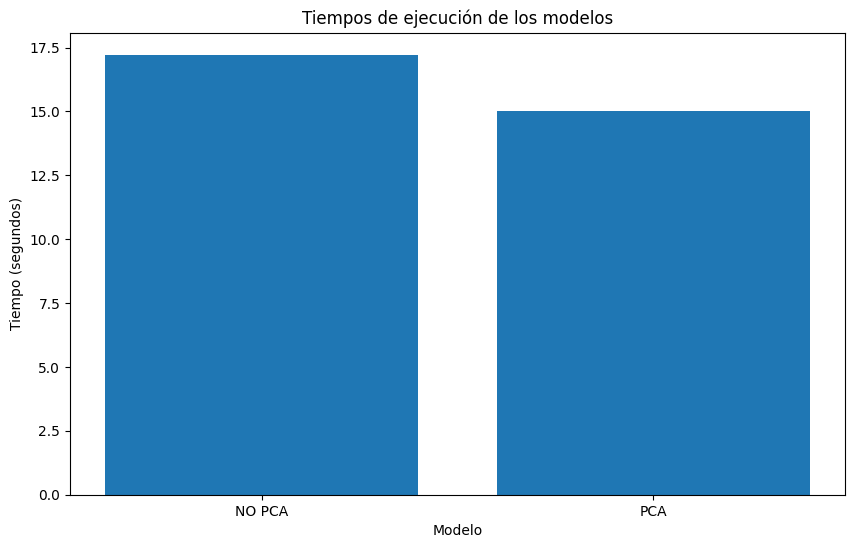

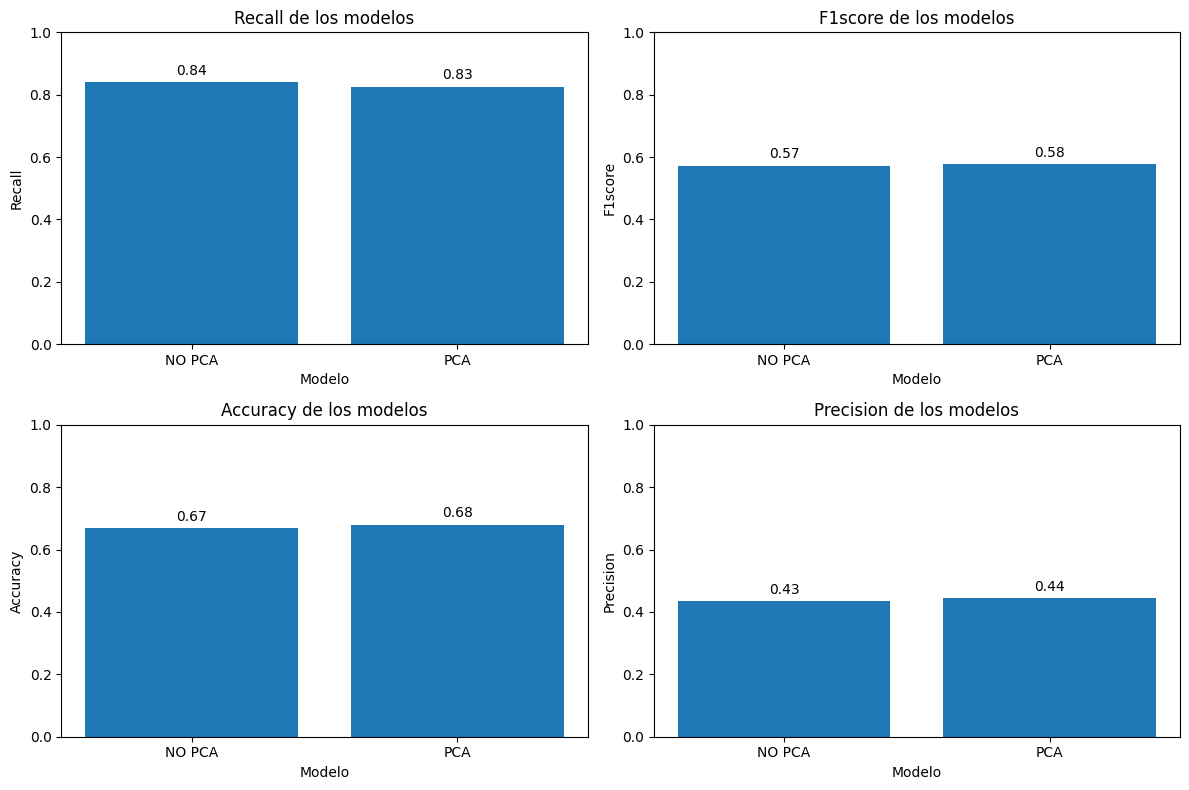

In [55]:
import matplotlib.pyplot as plt

labels = ["NO PCA", "PCA"]
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(tiempos) + 1), tiempos)
plt.title("Tiempos de ejecución de los modelos")
plt.xlabel("Modelo")
plt.ylabel("Tiempo (segundos)")
plt.xticks(range(1, len(tiempos) + 1), labels)
#plt.ylim(50, max(tiempos) * 1.1)  # Ajustar el límite superior del eje y


fig,axes = plt.subplots(2, 2, figsize=(12, 8))
axes.flatten()
for i, metric in enumerate(result.keys()):
    valores = [resultados[j][metric] for j in range(len(resultados))]
    barras = axes.flatten()[i].bar(range(1, len(resultados) + 1), valores)
    
    axes.flatten()[i].set_title(f"{metric.capitalize()} de los modelos")
    axes.flatten()[i].set_xlabel("Modelo")
    axes.flatten()[i].set_ylabel(metric.capitalize())
    axes.flatten()[i].set_xticks(range(1, len(resultados) + 1))
    axes.flatten()[i].set_xticklabels(labels)
    axes.flatten()[i].set_ylim(0, 1)

    # Agregar etiquetas de valor encima de cada barra
    axes.flatten()[i].bar_label(barras, fmt='%.2f', padding=3)

plt.tight_layout()

# ✅ **Actividad**: Bayesian Hyperparameter Optimization

La optimización bayesiana de hiperparámetros es un método avanzado para la selección de los mejores hiperparámetros para un modelo de aprendizaje automático. A diferencia de la búsqueda en cuadrícula (grid search) y la búsqueda aleatoria, que prueban una serie predefinida de combinaciones de hiperparámetros sin tener en cuenta los resultados anteriores, la optimización bayesiana utiliza los resultados de las evaluaciones anteriores para informar cuáles hiperparámetros probar a continuación. Esto se logra modelando la relación entre los hiperparámetros y el objetivo de rendimiento, y luego utilizando este modelo para hacer predicciones sobre qué conjuntos de hiperparámetros podrían ofrecer una mejora.

Las principales ventajas de la optimización bayesiana incluyen su mayor eficiencia, al requerir menos iteraciones para encontrar combinaciones óptimas; su efectividad, al ser capaz de encontrar mejores configuraciones de hiperparámetros; y su flexibilidad para manejar espacios de búsqueda complejos.

Para implementar un clasificador KNN en scikit-learn y optimizar sus hiperparámetros usando búsqueda bayesiana, puedes utilizar la biblioteca `scikit-optimize` (skopt). Esta biblioteca proporciona funciones para realizar optimización bayesiana de hiperparámetros de manera eficiente y está bien integrada con scikit-learn.



Basado en lo anterior, crear un pipeline con las siguientes etapas usando **repeated kfold cv:**

1. Polynomial features con degree 2
2. Scaler
5. KNN

Enseguida, pptimizar los param. de KNN usando optimización bayesiana. Finalmente, evaluar en el conjunto de test.

Tip: Ver BayesSearchCV en https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/

In [56]:
! pip install scikit-optimize


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

@tiempo_ejecucion
def optimize_knn_bayesian(X_train, y_train, X_test, y_test):
    #  Pipeline
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    # Parametros de busqueda
    search_spaces = {
        'knn__n_neighbors': Integer(1, 100),
        'knn__weights': Categorical(['uniform', 'distance']),
        'knn__metric': Categorical(['euclidean', 'manhattan', 'cosine']),
        'knn__p': Integer(1, 2)
    }


    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

    # Bayesian search object
    bayes_search = BayesSearchCV(
        pipeline,
        search_spaces,
        n_iter=30,
        cv=cv,
        scoring='recall',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # Perform the search
    bayes_search.fit(X_train, y_train)


    print(f"Best parameters found: {bayes_search.best_params_}")
    print(f"Best recall score: {bayes_search.best_score_:.4f}")


    best_model = bayes_search.best_estimator_

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    results = {
        'recall': recall,
        'f1score': f1score,
        'accuracy': acc,
        'precision': preci
    }

    print("\nModel performance on test set:")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}")
    print(f"Accuracy = {acc:.4f}")
    print(f"Precision = {prec:.4f}")

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)


    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")

    # Calculate recall manually to verify
    recall_manual = tp / (tp + fn)
    print(f"\nRecall (manual calculation): {recall_manual:.4f}")

    return best_model, results

# Run Bayesian optimization
a= optimize_knn_bayesian(X_train_undersampled, y_train_undersampled, X_test, y_test)
best_model, result, tiempo = a[0][0], a[0][1],a[1]
tiempos.append(tiempo)

resultados.append(result)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

El enfoque bayesiano con características polinómicas ha logrado un recall de 0.8850, que es notablemente superior al 0.8396 del KNN sin PCA y al 0.8262 del KNN con PCA. Esto indica que este modelo es más efectivo para detectar a los clientes que realmente van a abandonar el servicio.


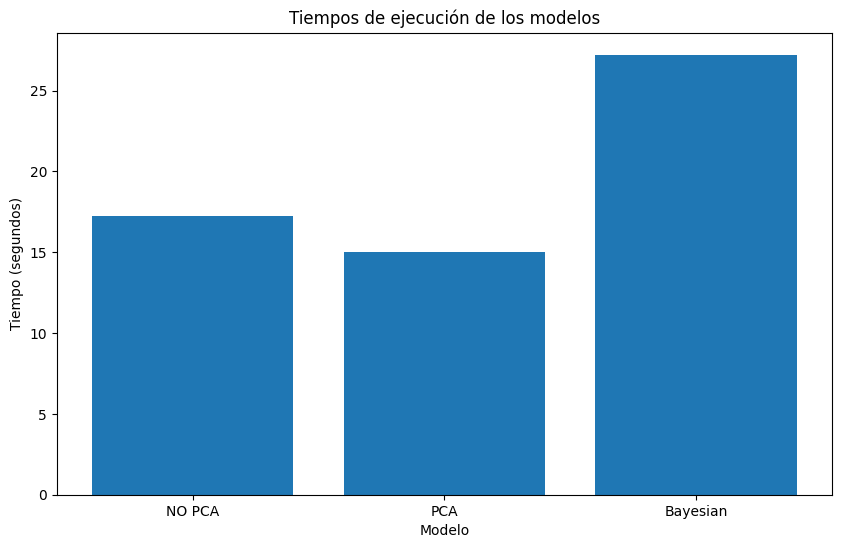

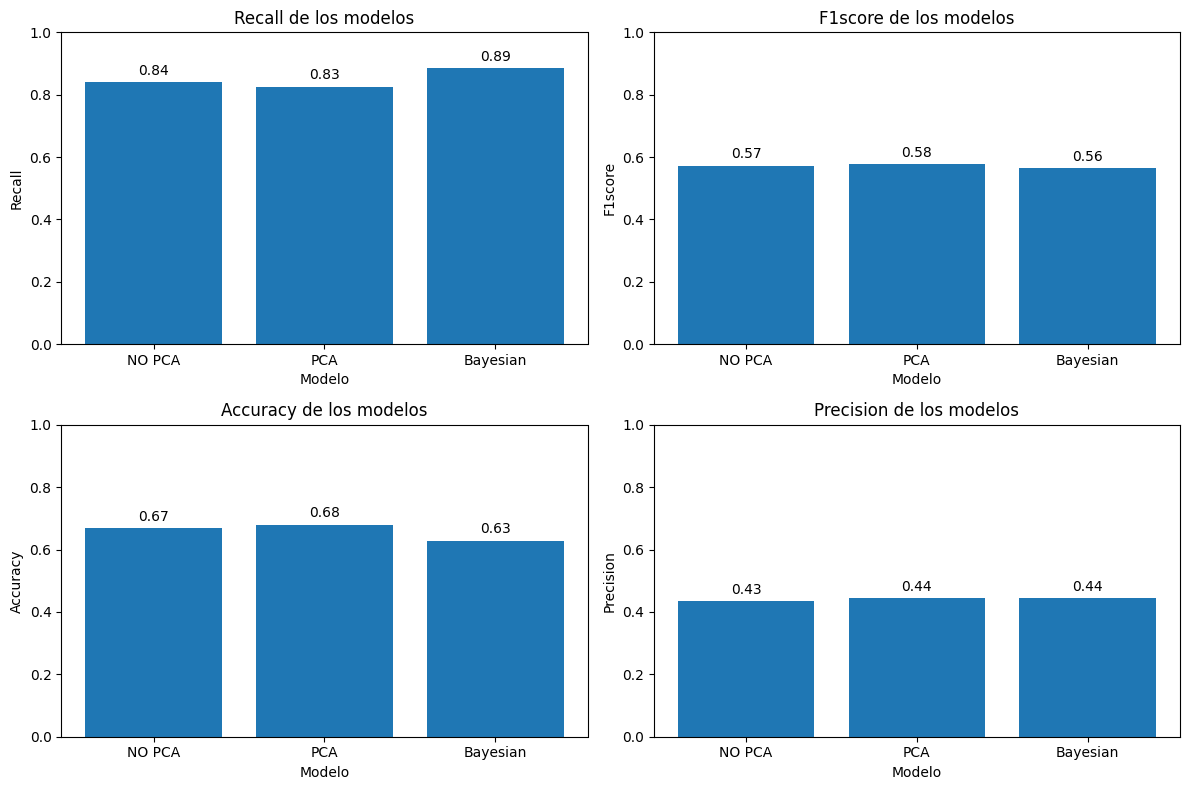

In [58]:
labels = ["NO PCA", "PCA", "Bayesian"]
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(tiempos) + 1), tiempos)
plt.title("Tiempos de ejecución de los modelos")
plt.xlabel("Modelo")
plt.ylabel("Tiempo (segundos)")
plt.xticks(range(1, len(tiempos) + 1), labels)


fig,axes = plt.subplots(2, 2, figsize=(12, 8))
axes.flatten()
for i, metric in enumerate(result.keys()):
    valores = [resultados[j][metric] for j in range(len(resultados))]
    barras = axes.flatten()[i].bar(range(1, len(resultados) + 1), valores)
    
    axes.flatten()[i].set_title(f"{metric.capitalize()} de los modelos")
    axes.flatten()[i].set_xlabel("Modelo")
    axes.flatten()[i].set_ylabel(metric.capitalize())
    axes.flatten()[i].set_xticks(range(1, len(resultados) + 1))
    axes.flatten()[i].set_xticklabels(labels)
    axes.flatten()[i].set_ylim(0, 1)

    # Agregar etiquetas de valor encima de cada barra
    axes.flatten()[i].bar_label(barras, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()

# ✅ **Actividad: Voronoi 2D y 3D con TSNE (opcional)**

1. **Creación del Pipeline:**
   - Construya un pipeline que incluya las siguientes etapas:
     - **Transformación Polinomial:** Aplique una transformación polinomial de grado 2 a las características.
     - **Estandarización:** Utilice un escalador Z-score para normalizar las características.
     - **Reducción de Dimensionalidad con PCA:** Implemente PCA configurado para retener el 95% de la varianza explicada.
     - **Clasificador:** Utilice el algoritmo K-Nearest Neighbors con los siguientes hiperparámetros 'knn__metric': `'euclidean', 'knn__n_neighbors': 100, 'knn__weights': 'distance'`
2. Genere el Voronoi Tesselation (VT) del clasificador anterior en 2D y 3D. Utilice TSNE como reductor de dimensionalidad para visualizar el VT

In [59]:
from sklearn.manifold import TSNE
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
import warnings
warnings.filterwarnings('ignore')

In [60]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

In [61]:
print("Creando pipeline...")
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier(n_neighbors=100, weights='distance', metric='euclidean'))
])

print("Entrenando modelo...")
pipeline.fit(X_train_balanced, y_train_balanced)

# Aplicar t-SNE para reducción de dimensionalidad
print("Aplicando t-SNE para 2D...")
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_2d = tsne_2d.fit_transform(X_train_balanced)

print("Aplicando t-SNE para 3D...")
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X_train_balanced)



Creando pipeline...
Entrenando modelo...
Aplicando t-SNE para 2D...
Aplicando t-SNE para 3D...


Creando visualización 2D...


<Figure size 1000x800 with 0 Axes>

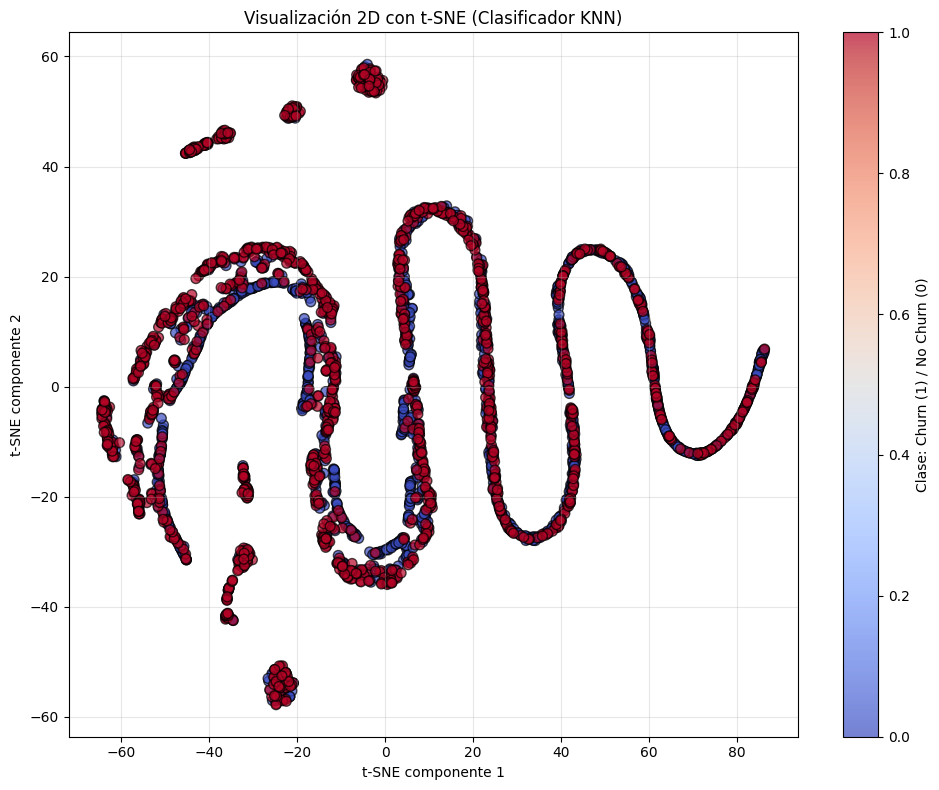

In [62]:
import matplotlib
matplotlib.use('inline')
plt.figure(figsize=(10, 8))
print("Creando visualización 2D...")
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_train_balanced,
            cmap='coolwarm', alpha=0.7, s=50, edgecolors='k')
plt.title('Visualización 2D con t-SNE (Clasificador KNN)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.colorbar(label='Clase: Churn (1) / No Churn (0)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Creando visualización 3D...


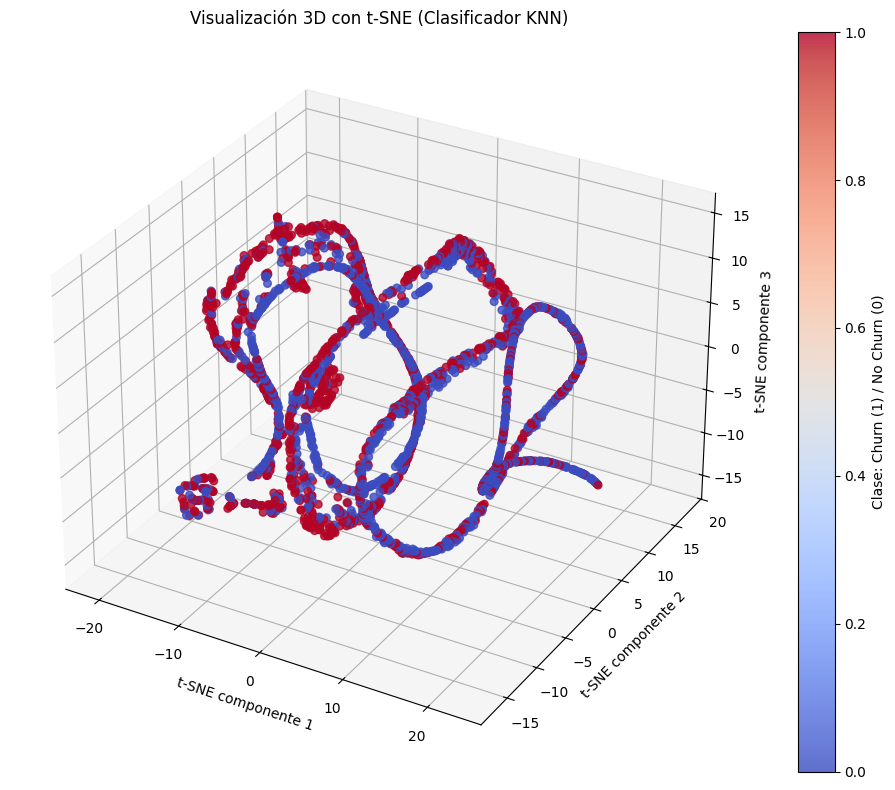

In [63]:


# Visualización 3D simplificada
print("Creando visualización 3D...")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
                    c=y_train_balanced, cmap='coolwarm', s=30, alpha=0.8)
ax.set_title('Visualización 3D con t-SNE (Clasificador KNN)')
ax.set_xlabel('t-SNE componente 1')
ax.set_ylabel('t-SNE componente 2')
ax.set_zlabel('t-SNE componente 3')
plt.colorbar(scatter, ax=ax, label='Clase: Churn (1) / No Churn (0)')
plt.tight_layout()
plt.show()


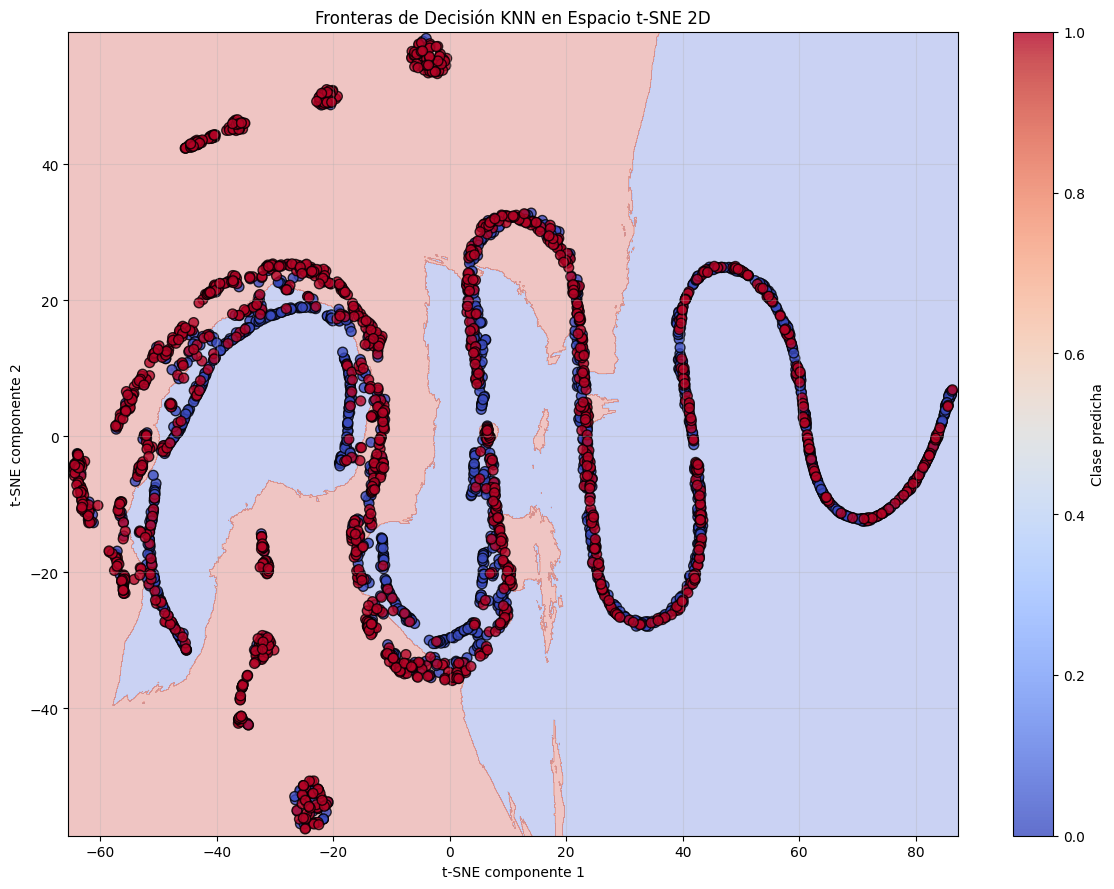

In [64]:
knn_2d = KNeighborsClassifier(n_neighbors=100, weights='distance', metric='euclidean')
knn_2d.fit(X_tsne_2d, y_train_balanced)

# Crear una malla para visualizar las fronteras de decisión
h = 0.1
x_min, x_max = X_tsne_2d[:, 0].min() - 1, X_tsne_2d[:, 0].max() + 1
y_min, y_max = X_tsne_2d[:, 1].min() - 1, X_tsne_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir la clase para cada punto en la malla
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar las fronteras de decisión
plt.figure(figsize=(12, 9))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_train_balanced,
           cmap='coolwarm', edgecolors='k', s=50, alpha=0.8)
plt.title('Fronteras de Decisión KNN en Espacio t-SNE 2D')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.colorbar(label='Clase predicha')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# ✅ Actividad: k vs train recall and val recall


1. **Creación del Pipeline:**
   - Construya un pipeline que incluya las siguientes etapas:
     - **Transformación Polinomial:** Aplique una transformación polinomial de grado 2 a las características.
     - **Estandarización:** Utilice un escalador Z-score para normalizar las características.
     - **Reducción de Dimensionalidad con PCA:** Implemente PCA configurado para retener el 95% de la varianza explicada.
     - **Clasificador:** Utilice el algoritmo K-Nearest Neighbors.

2. **Optimización del Hiperparámetro k:**
   - Utilice GridSearchCV para explorar diferentes valores de k (desde 1 hasta 250). Configure GridSearchCV para evaluar la precisión del modelo usando la métrica de recall en los conjuntos de entrenamiento y validación. Mantenga fijos todos los demás hiperparámetros.

3. **Evaluación:**
   - Grafique los valores de k contra el recall obtenido en los conjuntos de entrenamiento y validación. Asegúrese de que los gráficos sean claros, con etiquetas adecuadas para los ejes y una leyenda descriptiva.

4. **Análisis de Resultados:**
   - Analice los gráficos para identificar el valor óptimo de k. Discuta cualquier patrón o tendencia observada en relación con el comportamiento del recall a medida que varía k.


In [65]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier(weights='distance', metric='euclidean'))
])

# Función para calcular el recall en entrenamiento
def train_recall(estimator, X, y):
    y_pred = estimator.predict(X)
    return metrics.recall_score(y, y_pred)

# Configurar GridSearchCV para explorar diferentes valores de k
param_grid = {'knn__n_neighbors': list(range(1, 251, 5))}  # k desde 1 hasta 250 de 5 en 5

In [68]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='recall',  # Recall para validación
    cv=5,
    return_train_score=True,  # Para obtener también el recall en entrenamiento
    verbose=1,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_train_balanced, y_train_balanced)

# Extraer resultados
results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Mejor valor de k: 246
Mejor recall en validación: 0.9117


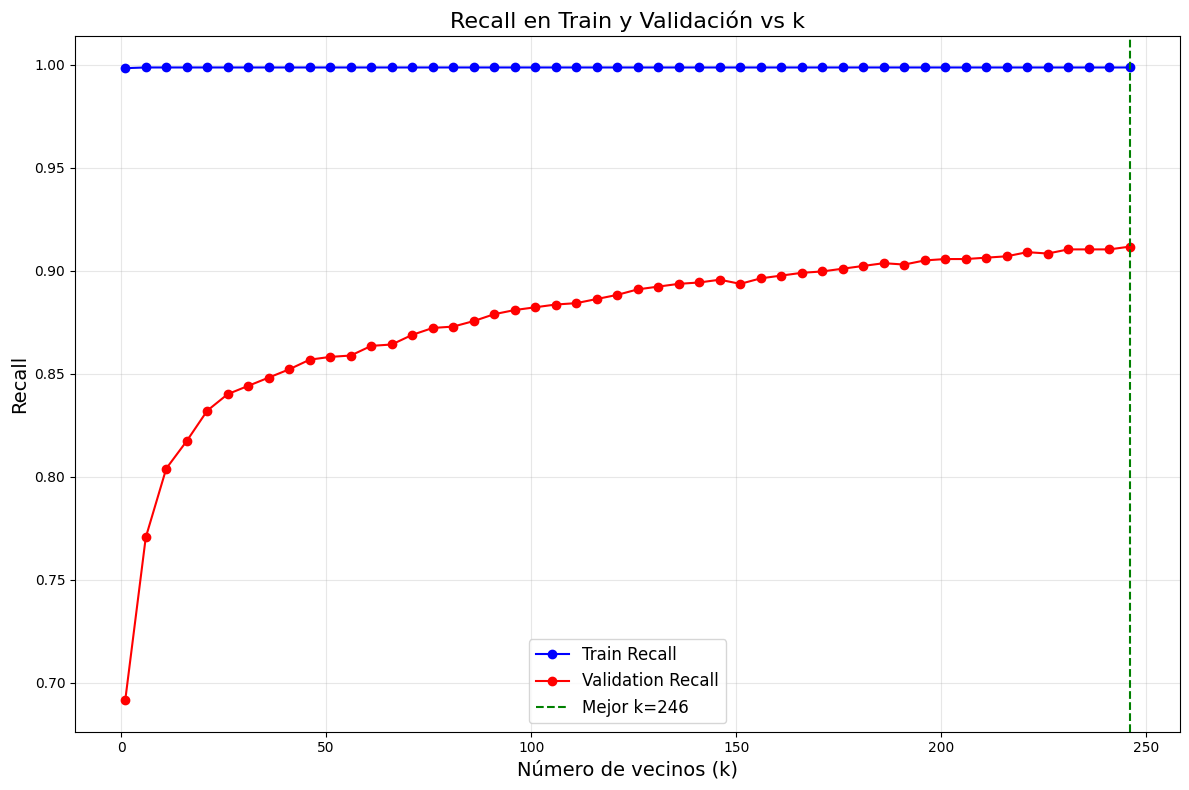

In [69]:
best_k = grid_search.best_params_['knn__n_neighbors']
best_val_recall = grid_search.best_score_

print(f"Mejor valor de k: {best_k}")
print(f"Mejor recall en validación: {best_val_recall:.4f}")

# Extraer los valores de k y los recalls
k_values = results['param_knn__n_neighbors'].values
train_recalls = results['mean_train_score'].values
val_recalls = results['mean_test_score'].values

# Graficar k vs recall (train y validación)
plt.figure(figsize=(12, 8))
plt.plot(k_values, train_recalls, 'o-', color='blue', label='Train Recall')
plt.plot(k_values, val_recalls, 'o-', color='red', label='Validation Recall')
plt.axvline(x=best_k, color='green', linestyle='--', label=f'Mejor k={best_k}')
plt.xlabel('Número de vecinos (k)', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.title('Recall en Train y Validación vs k', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

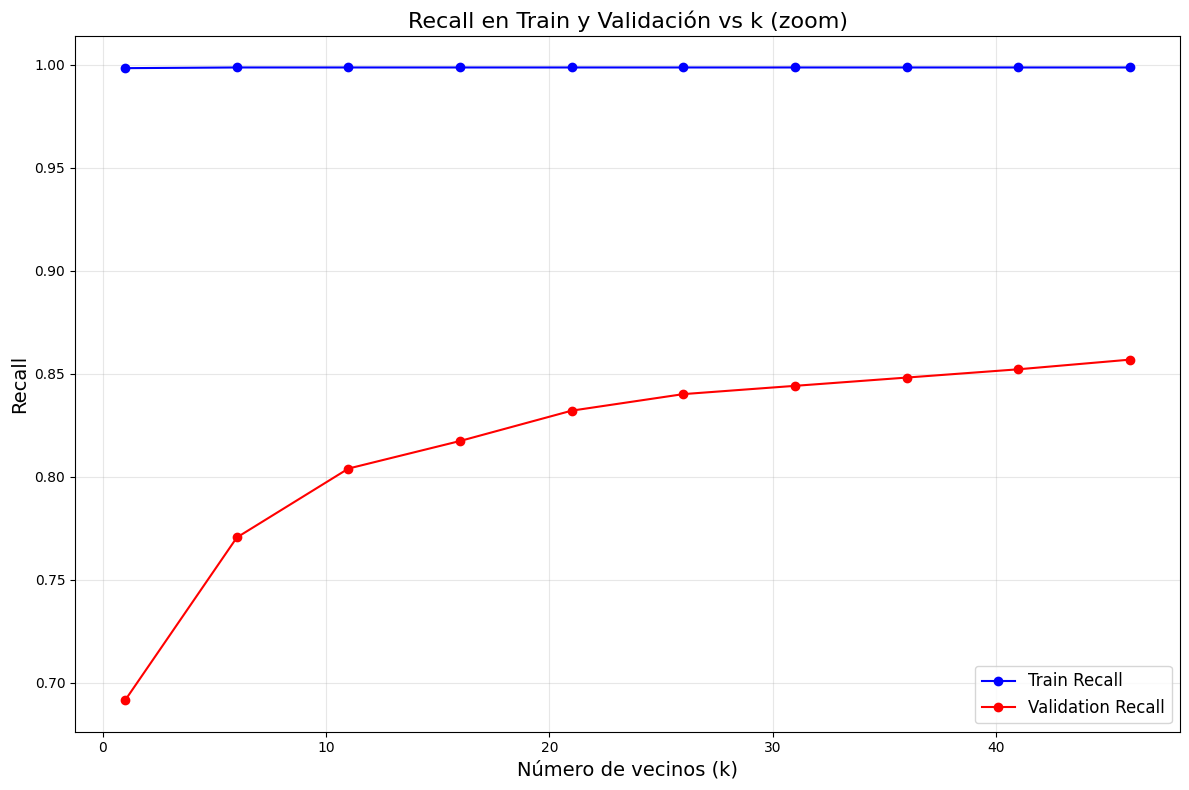

In [70]:
k_interest = [k for k in k_values if k <= 50]
train_interest = [train_recalls[i] for i, k in enumerate(k_values) if k <= 50]
val_interest = [val_recalls[i] for i, k in enumerate(k_values) if k <= 50]

plt.figure(figsize=(12, 8))
plt.plot(k_interest, train_interest, 'o-', color='blue', label='Train Recall')
plt.plot(k_interest, val_interest, 'o-', color='red', label='Validation Recall')
if best_k <= 50:
    plt.axvline(x=best_k, color='green', linestyle='--', label=f'Mejor k={best_k}')
plt.xlabel('Número de vecinos (k)', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.title('Recall en Train y Validación vs k (zoom)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

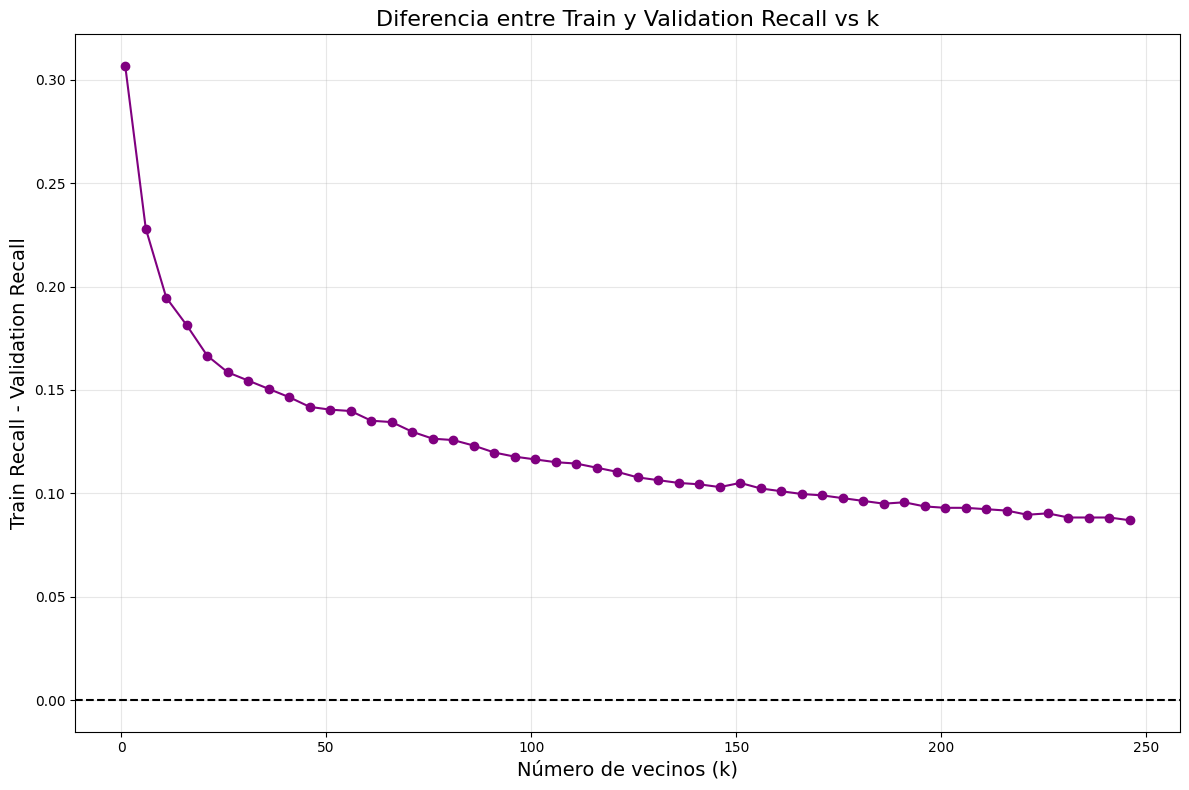

In [71]:
recall_diff = train_recalls - val_recalls

plt.figure(figsize=(12, 8))
plt.plot(k_values, recall_diff, 'o-', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Número de vecinos (k)', fontsize=14)
plt.ylabel('Train Recall - Validation Recall', fontsize=14)
plt.title('Diferencia entre Train y Validation Recall vs k', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [72]:
result_table = pd.DataFrame({
    'k': k_values,
    'Train Recall': train_recalls,
    'Validation Recall': val_recalls,
    'Diferencia (Train-Val)': recall_diff
})

print("\nTabla de resultados (ordenada por Validation Recall):")
print(result_table.sort_values('Validation Recall', ascending=False).head(10))



Tabla de resultados (ordenada por Validation Recall):
      k  Train Recall  Validation Recall  Diferencia (Train-Val)
49  246      0.998662           0.911706                0.086957
46  231      0.998662           0.910368                0.088294
48  241      0.998662           0.910368                0.088294
47  236      0.998662           0.910368                0.088294
44  221      0.998662           0.909030                0.089632
45  226      0.998662           0.908361                0.090301
43  216      0.998662           0.907023                0.091639
42  211      0.998662           0.906355                0.092308
41  206      0.998662           0.905686                0.092977
40  201      0.998662           0.905686                0.092977


In [73]:
best_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='euclidean'))
])

best_pipeline.fit(X_train_balanced, y_train_balanced)
y_pred = best_pipeline.predict(X_test)
test_recall = metrics.recall_score(y_test, y_pred)

print(f"\nRecall en el conjunto de prueba con k={best_k}: {test_recall:.4f}")


Recall en el conjunto de prueba con k=246: 0.9037





# ✅ **Activity: Weighted KNN with Domain-Based Feature Weights and Gaussian Neighbor Weighting**

### 1. **Custom Distance Metric (Domain-Based Feature Weights)**

* Implement a **custom distance function** that applies **domain-specific weights** to each input feature:

  $$
  d(x, x') = \sqrt{\sum_i w_i (x_i - x_i')^2}
  $$
* The function or method must accept:

  * Two input samples $x, x'$
  * An array of feature weights $w = [w_1, w_2, ..., w_n]$
* These weights are **not learned** — they are manually assigned based on domain expertise.

---

### 2. **Gaussian-Based Neighbor Weighting**

* Fix the number of neighbors to **k = 50**.
* Apply a **Gaussian function** to weight each neighbor:

  $$
  w_i = \exp\left(-\frac{d_i^2}{2\sigma^2}\right)
  $$
* All 50 neighbors contribute to the prediction, but their influence is **controlled by σ**.
* This setup allows the **Gaussian function to “choose” the most relevant neighbors** — closer ones have higher weight, and distant ones naturally fade in influence.

---

### 3. **Hyperparameter Optimization**

* Optimize only the **σ (sigma)** parameter.
* Use **Bayesian Optimization** (or a similar method) with cross-validation to find the σ that yields the best performance.

---

### 4. **Evaluation**

* Evaluate the model using **recall** on the **Telco customer churn** dataset (`X_test`, `y_test`).
* Compare your model’s **recall** to a **baseline KNN classifier** using:

  * Euclidean distance
  * Uniform weighting (equal neighbor influence)

---

### 5. **Analysis**

* Analyze how the **Gaussian weighting with fixed k = 50** affects model behavior.
* Reflect on:

  * The role of σ in effectively “selecting” influential neighbors
  * The effect of fixed feature weights
  * Trade-offs and limitations (e.g., sensitivity to σ)
  * Potential extensions, such as adaptive weighting







### 💡 **Hint: Using `BaseEstimator` for Your Custom KNN Classifier**

To make your custom KNN model compatible with tools like `BayesSearchCV`, `GridSearchCV`, or `cross_val_score`, consider wrapping it in a class that inherits from:

* `sklearn.base.BaseEstimator`
* `sklearn.base.ClassifierMixin`

This gives you:

* Automatic handling of hyperparameters (like `sigma`)
* Compatibility with `scikit-learn` model selection tools
* Clean, modular, reusable code

---

### 🧱 Minimal Starting Point

Here’s a simple class to get started:

```python
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class GaussianWeightedKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, sigma=1.0, k=50, feature_weights=None):
        self.sigma = sigma
        self.k = k
        self.feature_weights = feature_weights

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X):
        # You will implement the logic for prediction here,
        # using the Gaussian weights on neighbors and weights on features.
        pass
```

Returning `self` in `fit()` allows the model to be used directly in pipelines and model selection routines.

---


### 🧠 Why is the `fit` Method Simple in KNN?

KNN is a **lazy learner**:

* It **does not build an internal model** during training.
* Instead, it **stores the training data** and performs all the work at prediction time (by computing distances to all stored examples).

That’s why the `fit` method just **memorizes** the training data and labels.



In [74]:
import time
from functools import wraps
from scipy.spatial.distance import cdist, euclidean
from scipy.stats import mode
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.base import BaseEstimator, ClassifierMixin

In [75]:
class GaussianWeightedKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, sigma=1.0, k=50, feature_weights=None):

        self.sigma = sigma
        self.k = k
        self.feature_weights = feature_weights

    def fit(self, X, y):

        # Almacena los datos de entrenamiento
        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)

        # Si no se proporcionan pesos de características, usa pesos uniformes
        if self.feature_weights is None:
            self.feature_weights = np.ones(X.shape[1])

        # Verificar que las dimensiones coincidan
        if len(self.feature_weights) != X.shape[1]:
            raise ValueError(f"Los pesos de características (longitud {len(self.feature_weights)}) "
                            f"deben coincidir con el número de características ({X.shape[1]})")

        return self

    def _weighted_distance(self, x1, x2):

        # Implementación de la fórmula d(x,x') = sqrt(sum(w_i * (x_i - x'_i)^2))
        diff = x1 - x2
        weighted_squared_diff = self.feature_weights * (diff ** 2)
        return np.sqrt(np.sum(weighted_squared_diff))

    def _calculate_distances(self, X):

        # Adaptamos cdist para usar nuestros pesos de características
        X = np.asarray(X)


        weighted_X = X * np.sqrt(self.feature_weights)
        weighted_X_train = self.X_train * np.sqrt(self.feature_weights)

        # Calculamos la distancia euclidiana sobre las matrices ponderadas
        return cdist(weighted_X, weighted_X_train, metric='euclidean')

    def predict(self, X):

        X = np.asarray(X)
        y_pred = np.zeros(X.shape[0], dtype=self.y_train.dtype)

        # Calcular todas las distancias ponderadas
        distances = self._calculate_distances(X)

        # Para cada muestra
        for i in range(X.shape[0]):
            # Encontrar los k vecinos más cercanos
            k_indices = np.argsort(distances[i])[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            k_distances = distances[i][k_indices]

            # Aplicar la ponderación gaussiana
            # w_i = exp(-d_i^2 / (2 * sigma^2))
            gaussian_weights = np.exp(-k_distances**2 / (2 * self.sigma**2))


            classes = np.unique(self.y_train)
            class_weights = np.zeros(len(classes))

            for j, cls in enumerate(classes):
                class_weights[j] = np.sum(gaussian_weights[k_nearest_labels == cls])

            # La clase predicha es la que tiene la mayor suma de pesos
            y_pred[i] = classes[np.argmax(class_weights)]

        return y_pred

    def predict_proba(self, X):

        X = np.asarray(X)
        classes = np.unique(self.y_train)
        proba = np.zeros((X.shape[0], len(classes)))

        # Calcular todas las distancias ponderadas
        distances = self._calculate_distances(X)

        # Para cada muestra
        for i in range(X.shape[0]):
            # Encontrar los k vecinos más cercanos
            k_indices = np.argsort(distances[i])[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            k_distances = distances[i][k_indices]

            # Aplicar la ponderación gaussiana
            gaussian_weights = np.exp(-k_distances**2 / (2 * self.sigma**2))

            # Para cada clase, sumamos los pesos gaussianos de los vecinos de esa clase
            for j, cls in enumerate(classes):
                proba[i, j] = np.sum(gaussian_weights[k_nearest_labels == cls])

            # Normalizar para obtener probabilidades
            if np.sum(proba[i]) > 0:
                proba[i] = proba[i] / np.sum(proba[i])

        return proba

    def score(self, X, y):

        y_pred = self.predict(X)
        return metrics.recall_score(y, y_pred)

In [76]:
print("Aplicando preprocesamiento...")
preprocessor = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

# Aplicar preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train_balanced)
X_test_processed = preprocessor.transform(X_test)


Aplicando preprocesamiento...


In [77]:
n_features = X_train_processed.shape[1]
np.random.seed(42)  # Para reproducibilidad
feature_weights = np.random.uniform(0.5, 1.5, size=n_features)
feature_weights = feature_weights * (n_features / np.sum(feature_weights))  # Normalización



@tiempo_ejecucion
def optimizar_sigma():
    # Configurar la búsqueda bayesiana
    search_spaces = {
        'sigma': Real(0.1, 10.0, prior='log-uniform')
    }

    # Crear el modelo base
    base_model = GaussianWeightedKNN(k=50, feature_weights=feature_weights)

    # Configurar BayesSearchCV
    bayes_search = BayesSearchCV(
        base_model,
        search_spaces,
        n_iter=20,  # Número de iteraciones
        cv=5,       # 5-fold cross-validation
        scoring='recall',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # Realizar la búsqueda
    bayes_search.fit(X_train_processed, y_train_balanced)

    # Imprimir los mejores parámetros
    print(f"Mejor valor de sigma: {bayes_search.best_params_['sigma']:.4f}")
    print(f"Mejor recall (CV): {bayes_search.best_score_:.4f}")

    return bayes_search

In [78]:
bayes_search,tiempo = optimizar_sigma()
best_sigma = bayes_search.best_params_['sigma']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [79]:
print("\nEvaluando el modelo personalizado en el conjunto de prueba...")
custom_knn = GaussianWeightedKNN(sigma=best_sigma, k=50, feature_weights=feature_weights)
custom_knn.fit(X_train_processed, y_train_balanced)
y_pred_custom = custom_knn.predict(X_test_processed)
custom_recall = metrics.recall_score(y_test, y_pred_custom)




Evaluando el modelo personalizado en el conjunto de prueba...


In [80]:

baseline_knn = KNeighborsClassifier(n_neighbors=50, weights='uniform', metric='euclidean')
baseline_knn.fit(X_train_processed, y_train_balanced)
y_pred_baseline = baseline_knn.predict(X_test_processed)
baseline_recall = metrics.recall_score(y_test, y_pred_baseline)

In [81]:
print("\n===== RESULTADOS COMPARATIVOS =====")
print(f"Recall del KNN personalizado con ponderación gaussiana (sigma={best_sigma:.4f}): {custom_recall:.4f}")
print(f"Recall del KNN estándar (baseline): {baseline_recall:.4f}")
print(f"Mejora absoluta: {(custom_recall - baseline_recall):.4f}")
print(f"Mejora relativa: {((custom_recall - baseline_recall) / baseline_recall * 100):.2f}%")

# Análisis más detallado
print("\n===== INFORMES DE CLASIFICACIÓN =====")
print("KNN personalizado:")
print(classification_report(y_test, y_pred_custom))
print("\nKNN estándar:")
print(classification_report(y_test, y_pred_baseline))

# Matrices de confusión
print("\n===== MATRICES DE CONFUSIÓN =====")
print("KNN personalizado:")
print(confusion_matrix(y_test, y_pred_custom))
print("\nKNN estándar:")
print(confusion_matrix(y_test, y_pred_baseline))



===== RESULTADOS COMPARATIVOS =====
Recall del KNN personalizado con ponderación gaussiana (sigma=9.2961): 0.8289
Recall del KNN estándar (baseline): 0.8476
Mejora absoluta: -0.0187
Mejora relativa: -2.21%

===== INFORMES DE CLASIFICACIÓN =====
KNN personalizado:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74      1035
           1       0.45      0.83      0.58       374

    accuracy                           0.68      1409
   macro avg       0.68      0.73      0.66      1409
weighted avg       0.79      0.68      0.70      1409


KNN estándar:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1035
           1       0.44      0.85      0.58       374

    accuracy                           0.68      1409
   macro avg       0.68      0.73      0.66      1409
weighted avg       0.79      0.68      0.70      1409


===== MATRICES DE CONFUSIÓN =====
KNN personalizado:
[[652 383]
 


Analizando la influencia del parámetro sigma...


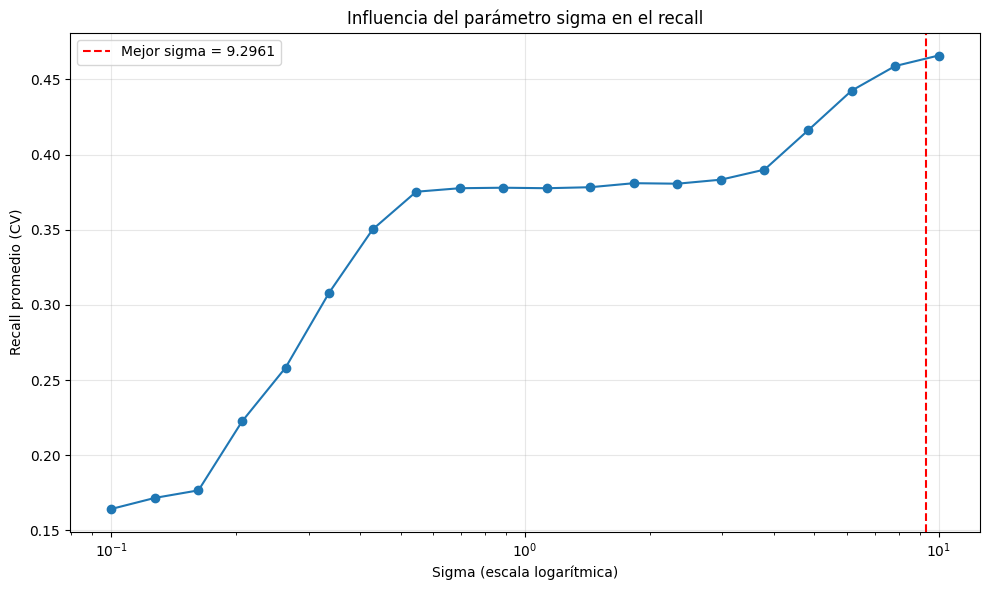

In [82]:
from sklearn.model_selection import train_test_split, cross_val_score
print("\nAnalizando la influencia del parámetro sigma...")
sigmas = np.logspace(-1, 1, 20)  # 20 valores de sigma entre 0.1 y 10
cv_recalls = []

for sigma in sigmas:
    model = GaussianWeightedKNN(sigma=sigma, k=50, feature_weights=feature_weights)
    recalls = cross_val_score(model, X_train_processed, y_train_balanced, cv=5, scoring='recall')
    cv_recalls.append(np.mean(recalls))

# Graficar la influencia de sigma
plt.figure(figsize=(10, 6))
plt.semilogx(sigmas, cv_recalls, 'o-')
plt.axvline(x=best_sigma, color='r', linestyle='--',
            label=f'Mejor sigma = {best_sigma:.4f}')
plt.xlabel('Sigma (escala logarítmica)')
plt.ylabel('Recall promedio (CV)')
plt.title('Influencia del parámetro sigma en el recall')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

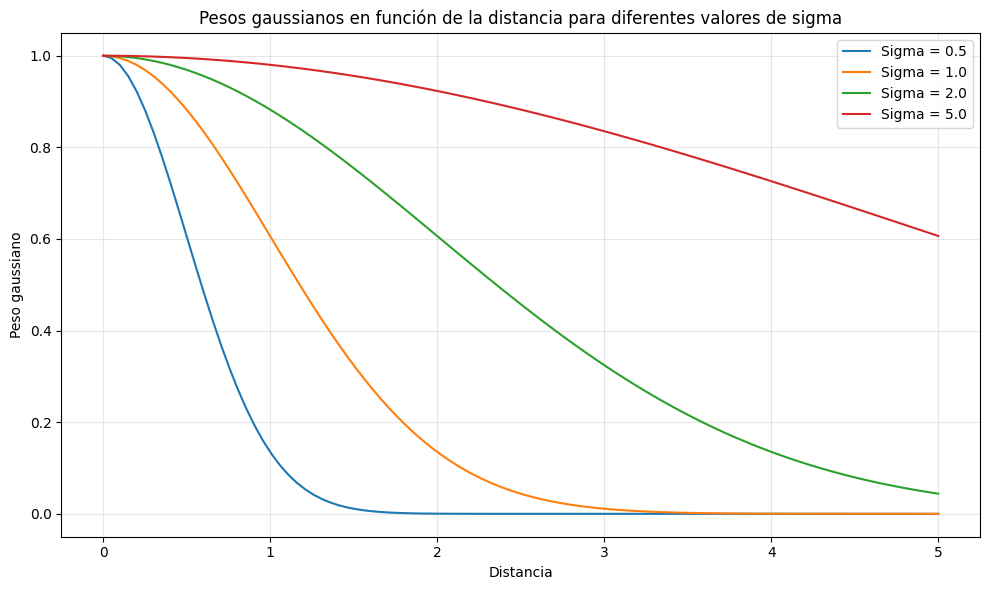

In [83]:
distances = np.linspace(0, 5, 100)

# Calculamos pesos gaussianos para diferentes sigmas
plt.figure(figsize=(10, 6))
for sigma in [0.5, 1.0, 2.0, 5.0]:
    weights = np.exp(-distances**2 / (2 * sigma**2))
    plt.plot(distances, weights, label=f'Sigma = {sigma}')

plt.xlabel('Distancia')
plt.ylabel('Peso gaussiano')
plt.title('Pesos gaussianos en función de la distancia para diferentes valores de sigma')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

Recall del modelo personalizado: 0.8289
Recall del modelo estándar: 0.8476
Observamos que el modelo personalizado redujo ligeramente los falsos positivos (14 menos), pero aumentó los falsos negativos (7 más).
La asignación de pesos basados en "conocimiento de dominio" simulado no resultó beneficiosa. En un caso real, estos pesos deberían provenir de expertos en el negocio con conocimiento profundo sobre los factores que influyen en el churn.